<a href="https://colab.research.google.com/github/cow-coding/ML-DL-Study/blob/master/DL%20from%20Scratch/Chap03/4.OutputLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import Library

In [1]:
import numpy as np

# OutPut Layer

신경망은 분류와 회귀 모두에 사용 가능  

어떤 문제를 다루냐가 출력층의 활성황 함수를 결정함  

- 회귀 (regression) : 항등함수 (idetity function)
- 분류 (classification) : 소프트맥스 (softmax function)

## Identity Function

항등함수(Identity function)는 입력 그대로 출력하는 함수  


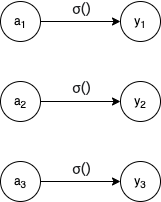

## Softmax Function

소프트맥스 함수(Softmax Function)의 식은 아래와 같다.

$$
y_{k} = \frac{ exp(a_{k}) }{ \sum^{n}_{i=1}exp(a_{i}) } = \frac{ e^{a_{k}} }{ \sum^{n}_{i=1}e^{a_{i}} }
$$  

- n : 출력층의 뉴런 수
- $y_{k}$ : 출력층의 뉴런 중 k번째 출력
- $a_{k}$ : 입력 신호

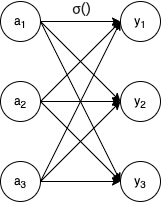

### Softmax implementation

In [2]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) # exponential function
print(exp_a)

sum_exp_a = np.sum(exp_a) # sum of exponential function
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [3]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

### Caution in Implementation

소프트맥스를 구현할 때, 오버플로 문제를 주의해야한다.  

지수 함수를 활용할 때 지수값을 주의해야한다.  

이를 해결할 수 있는 수식 변환이 존재한다.  



### Solution of overflow problem

$$
y_{k} = \frac{exp(a_{k}}{\sum_{i = 1}^{n} exp(a_{i})} \\
\\
= \frac{C exp(a_{k}}{C\sum_{i = 1}^{n} exp(a_{i})} \\
\\
= \frac{exp(a_{k} + \log{C})}{\sum^{i = 1}_{n}exp(a_{i} + \log{C})} \\
\\
= \frac{exp(a_{k} + C')}{\sum^{i = 1}_{n}exp(a_{i} + C')}
$$  

전개 방식은 간단하다.  

분모와 분자에 모두 임의의 정수를 곱하고 $exp$안으로 넣으면서 로그연산으로 변경한다.  

로그값도 어떤 값으로 변형가능하므로 $C'$으로 기호를 변경해준다.  

여기서 정리한 식으로 알 수 있는 것은 소프트맥스의 지수함수를 계산하는 과정에서 어떤 정수를 덧셈/뺄셈 연산을 해도 결과는 동일하다는 것을 알 수 있다.  

이를 활용하면 오버플로 문제 해결을 위해서 입력 중 최댓값을 처리하면 된다.

#### Example of Solutin

In [4]:
a = np.array([1010, 1000, 990])
print(np.exp(a) / np.sum(np.exp(a))) # softmax function # output is nan

c = np.max(a)
print(a - c)

print(np.exp(a - c) / np.sum(np.exp(a - c)))

[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


### Reimplementation Softmax function

In [5]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c) # overflow solution
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

### Characteristic of Softmax function

모든 소프트맥스 함수 출력의 합은 1이다.  

이런 원리로 소프트맥스 함수 출력을 '확률'로 해석할 수 있다.

In [7]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

위의 예를보면 `y[0]`의 확률은 0.018(1.8%), `y[1]`의 확률은 0.245(24.5%), `y[2]`의 확률은 0.737(73.7%)로 해석할 수 있다.  

그리고 확률적 관점에서 보면 2번 원소의 확률이 가장 높으므로 답은 2번째 클래스라고 할 수 있다.